In [ ]:
!pip install -q fer

     |████████████████████████████████| 812 kB 6.6 MB/s 
     |████████████████████████████████| 2.3 MB 34.7 MB/s 


In [45]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from fer import FER
import os

In [46]:
def top_emotion(emotions):
  return sorted(emotions[0]["emotions"].items(), key = lambda x : x[1], reverse = True)[0][0]

def overlay_transparent(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )

    overlay_image = overlay[..., :overlay.shape[2]]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background

In [47]:
# setting up image for emotion dection with boudning boxes
image = cv2.imread('baby.jpg')
emotion = FER(mtcnn = True)

emotiondictionary = {
    "happy":"😁",
    "disgust":"🤢",
    "fear":"😰",
    "angry":"😠",
    "sad":"😢",
    "suprised":"😲"
}


In [48]:
#store a variables in a array 
struggle = emotion.detect_emotions(image)
to = top_emotion(struggle)

In [49]:
# creating a bounding box to read emotions 
box = struggle[0]["box"]

In [50]:
y2 = box[0]
y1 = box[1]
x2 = box[0]+box[2]
x1 = box[1]+box[3]

firstposition = (x1,y1)
secondposition = (x2,y2)

box_dimensions = [abs(x2-x1),abs(y2-y1)]


In [51]:
# CHANGE TO EMOJI PATH ON COMPUTER.
emoji_path = os.path.join("Melting Face Emoji.png")

emoji = cv2.imread(emoji_path, cv2.IMREAD_UNCHANGED)
emoji = cv2.cvtColor(emoji,cv2.COLOR_BGR2BGRA)
emoji = cv2.resize(emoji,box_dimensions)

In [52]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2BGRA)

In [53]:
final = overlay_transparent(image,emoji,x1,y1)

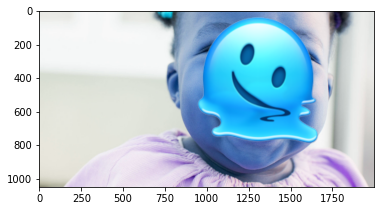

In [54]:
plt.imshow(final)

Test out with multiple faces on an image

Input: Image
Output: Image with Emojis on top

In [71]:
image = cv2.imread('wiggle.jpg')
struggle = emotion.detect_emotions(image)
struggle

[{'box': [2702, 714, 389, 521],
  'emotions': {'angry': 0.0,
   'disgust': 0.0,
   'fear': 0.0,
   'happy': 1.0,
   'neutral': 0.0,
   'sad': 0.0,
   'surprise': 0.0}},
 {'box': [2205, 1656, 26, 32],
  'emotions': {'angry': 0.02,
   'disgust': 0.0,
   'fear': 0.01,
   'happy': 0.42,
   'neutral': 0.36,
   'sad': 0.01,
   'surprise': 0.19}},
 {'box': [3644, 976, 383, 509],
  'emotions': {'angry': 0.37,
   'disgust': 0.0,
   'fear': 0.01,
   'happy': 0.08,
   'neutral': 0.4,
   'sad': 0.07,
   'surprise': 0.07}}]

In [72]:
for s in struggle:
  box = s['box']
  y2 = box[0]
  y1 = box[1]
  x2 = box[0]+box[2]
  x1 = box[1]+box[3]

  firstposition = (x1,y1)
  secondposition = (x2,y2)

  box_dimensions = [abs(x2-x1),abs(y2-y1)]
  print(box_dimensions)
  emoji_path = os.path.join("Melting Face Emoji.png")
  emoji = cv2.imread(emoji_path, cv2.IMREAD_UNCHANGED)
  emoji = cv2.cvtColor(emoji,cv2.COLOR_BGR2BGRA)
  emoji = cv2.resize(emoji,box_dimensions)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2BGRA)
  final = overlay_transparent(image,emoji,x1,y1)
  image = final

[1856, 1988]
[543, 549]
[2542, 2668]


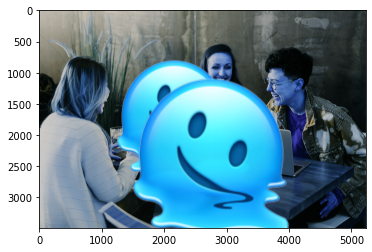

In [73]:
plt.imshow(image)